# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Bratislava, Bratislava, Slovakia**, or **Slovakia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Bratislava, Bratislava, Slovakia** to Ann Arbor, USA. In that case at least one source file must be about **Bratislava, Bratislava, Slovakia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Bratislava, Bratislava, Slovakia** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
# Install a pip package in the current Jupyter kernel 
# RESTART kernel after installation!
import sys
!{sys.executable} -m pip install lxml
!{sys.executable} -m pip install html5lib 
!{sys.executable} -m pip install bs4 

    100% |████████████████████████████████| 5.8MB 126kB/s 
You are using pip version 8.1.2, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 122kB 3.2MB/s 
You are using pip version 8.1.2, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 92kB 5.0MB/s 
  Running setup.py bdist_wheel for bs4 ... - \ done
  Stored in directory: /home/jovyan/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
You are using pip version 8.1.2, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [39]:
# Env setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import datetime as dt
import lxml
import html5lib
import bs4

In [2]:
# data sources
# https://en.wikipedia.org/wiki/Slovakia_at_the_Olympics
url_sr = pd.read_html('https://en.wikipedia.org/wiki/Slovakia_at_the_Olympics', header = 0)

# https://en.wikipedia.org/wiki/Czech_Republic_at_the_Olympics
url_cr = pd.read_html('https://en.wikipedia.org/wiki/Czech_Republic_at_the_Olympics', header = 0)

# https://en.wikipedia.org/wiki/Czechoslovakia_at_the_Olympics
url_csr = pd.read_html('https://en.wikipedia.org/wiki/Czechoslovakia_at_the_Olympics', header = 0)

In [11]:
# Slovakia
# summer Olympics - medal counts
summer_sr = url_sr[2]
summer_sr = summer_sr[np.isfinite(summer_sr['Rank'])]
summer_sr['Year'], summer_sr['Location'] = summer_sr['Games'].str.split(' ', 1).str

# winter Olympics - medal counts
winter_sr = url_sr[3]
winter_sr = winter_sr[(np.isfinite(winter_sr['Total'])) & (winter_sr['Games'] != 'Total')]
winter_sr['Year'], winter_sr['Location'] = winter_sr['Games'].str.split(' ', 1).str

# summer Olympics - sports & medal counts
summer_sports_sr = url_sr[5]
summer_sports_sr = summer_sports_sr[10:16]

# winter Olympics - sports & medal counts
winter_sports_sr = url_sr[6]
winter_sports_sr = winter_sports_sr[4:6]

# final data - medal counts
sr = pd.concat([summer_sr, winter_sr]).sort_values(by = ['Year'])
sr = sr[['Year', 'Location', 'Total']]

# final data - sports & medal counts
sports_sr = pd.concat([summer_sports_sr, winter_sports_sr]).sort_values(by = ['Total'], ascending = False)
sports_sr = sports_sr[['Sport', 'Total']]
sports_sr['Country'] = 'Slovak republic'

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Sport,Total,Country
10,Canoeing,18.0,Slovak republic
4,Biathlon,7.0,Slovak republic
12,Shooting,5.0,Slovak republic
13,Swimming,2.0,Slovak republic
11,Athletics,1.0,Slovak republic
14,Judo,1.0,Slovak republic
15,Wrestling,1.0,Slovak republic
5,Snowboarding,1.0,Slovak republic


In [12]:
# Czech republic
# summer Olympics - medal counts
summer_cr = url_cr[2]
summer_cr = summer_cr[np.isfinite(summer_cr['Rank'])]
summer_cr['Year'], summer_cr['Location'] = summer_cr['Games'].str.split(' ', 1).str

# winter Olympics - medal counts
winter_cr = url_cr[3]
winter_cr = winter_cr[(np.isfinite(winter_cr['Total'])) & (winter_cr['Games'] != 'Total')]
winter_cr['Year'], winter_cr['Location'] = winter_cr['Games'].str.split(' ', 1).str

# summer Olympics - sports & medal counts
summer_sports_cr = url_cr[5]
summer_sports_cr = summer_sports_cr[summer_sports_cr['Sport'] != 'Total']

# winter Olympics - sports & medal counts
winter_sports_cr = url_cr[6]
winter_sports_cr = winter_sports_cr[winter_sports_cr['Sport'] != 'Total']

# final data - medal counts
cr = pd.concat([summer_cr, winter_cr]).sort_values(by = ['Year'])
cr = cr[['Year', 'Location', 'Total']]

# final data - sports & medal counts
sports_cr = pd.concat([summer_sports_cr, winter_sports_cr]).sort_values(by = ['Total'], ascending = False)
sports_cr = sports_cr[['Sport', 'Total']]
sports_cr['Country'] = 'Czech republic'

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
# Czechoslovakia
# summer Olympics - medal counts
summer_csr = url_csr[2]
summer_csr = summer_csr[np.isfinite(summer_csr['Rank'])]
summer_csr['Year'], summer_csr['Location'] = summer_csr['Games'].str.split(' ', 1).str

# winter Olympics - medal counts
winter_csr = url_csr[3] 
winter_csr = winter_csr[(np.isfinite(winter_csr['Total'])) & (winter_csr['Games'] != 'Total')]
winter_csr['Year'], winter_csr['Location'] = winter_csr['Games'].str.split(' ', 1).str

# summer Olympics - sports & medal counts
summer_sports_csr = url_csr[5]
summer_sports_csr = summer_sports_csr[summer_sports_csr['Sport'] != 'Total*']

# winter Olympics - sports & medal counts
winter_sports_csr = url_csr[6]
winter_sports_csr = winter_sports_csr[winter_sports_csr['Sport'] != 'Total*']

# final data - medal counts
csr = pd.concat([summer_csr, winter_csr]).sort_values(by = ['Year'])
csr = csr[['Year', 'Location', 'Total']]
csr = csr.groupby(['Year'], as_index = False)['Total'].sum()

# final data - sports & medal counts
sports_csr = pd.concat([summer_sports_csr, winter_sports_csr]).sort_values(by = ['Total'], ascending = False)
sports_csr = sports_csr[['Sport', 'Total']]
sports_csr['Country'] = 'Czechoslovakia'

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [60]:
# sports & medal counts in one data file to plot it correctly
sports = pd.concat([sports_csr.head(3), sports_cr.head(3), sports_sr.head(3)])
sports = sports[['Country', 'Sport', 'Total']]

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


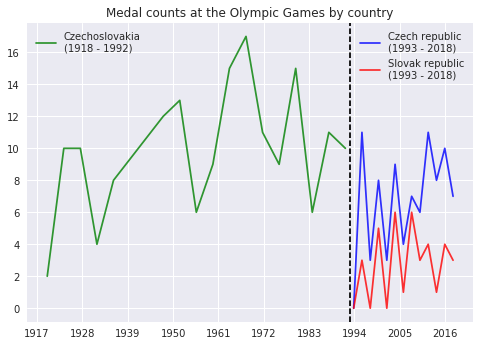

In [333]:
# plot the data - medal counts
# compare the number of medals from 1920 - 1992 (Czechoslovakia) and 1993- (separately for SK and CZ)
plt.figure()
ax = plt.gca()

# line charts
csr_plot, = plt.plot(pd.to_datetime(csr['Year']),  # without the comma, "plot1" and "plot2" are tuples instead of line objects
                    csr['Total'],
                    color = 'green',
                    alpha = 0.8)

cr_plot, = plt.plot(pd.to_datetime(cr['Year']),
                   cr['Total'],
                   color = 'blue',
                   alpha = 0.8)

sr_plot, = plt.plot(pd.to_datetime(sr['Year']),
                   sr['Total'],
                   color = 'red',
                   alpha = 0.8)

# chart tweaking
ax.spines['top'].set_visible(False) # don't show any borders around the chart\n",
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(2)) # only integer values on y axis
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0f}"))

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10)) # number of bins on x axis

ax.set_title('Medal counts at the Olympic Games by country') # set title

legend_csr = plt.legend([csr_plot],  # legend
                        ['Czechoslovakia\n(1918 - 1992)'],
                        loc = 'upper left',
                        frameon = False)

legend_cr_sr = plt.legend([cr_plot, sr_plot],
                          ['Czech republic\n(1993 - 2018)',
                           'Slovak republic\n(1993 - 2018)'],
                          loc = 'upper right',
                         frameon = False)

ax.add_artist(legend_csr)

plt.axvline(x = pd.to_datetime('1993'),  # add vertical line for the year of separation
           color = 'black',
           linestyle = 'dashed')

plt.show()

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


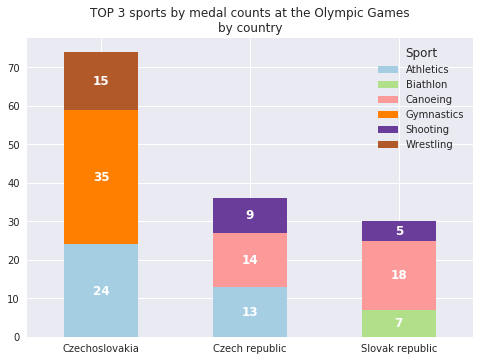

In [334]:
# plot the data - sports & medal counts
# look for the TOP 3 disciplines based on medal count
plt.figure()

# bar plot
order = ['Czechoslovakia', 'Czech republic', 'Slovak republic']

# need to reshape data to wide format
sports_pivotted = sports.pivot('Country', 'Sport', 'Total').loc[order].fillna(0)
sports_plot = sports_pivotted.plot(kind = 'bar', stacked = True, colormap = 'Paired')

values = sports_pivotted.values
values_list = [int(item) for sublist in values.T for item in sublist]

# chart tweaking
ax = plt.gca()

ax.set_title('TOP 3 sports by medal counts at the Olympic Games\nby country') # set title
ax.set_xlabel('') # remove label on x axis
plt.xticks(rotation=0) # remove rotation of ticks on x axis

# display value labels
rects = sports_plot.patches

for index, rect in enumerate(rects, start=0):
    if values_list[index] == 0:
        continue
    # print(index, values_list[index], rect.get_height())
    ax.text(rect.get_x() + rect.get_width() / 2.,
            rect.get_y() + rect.get_height() / 2.,
            str(values_list[index]),
            ha = 'center',
            va = 'center',
            color = 'white',
            fontweight = 'bold')

plt.show()